In [1]:
import pandas as pd
%matplotlib inline
df = pd.read_json('./AMDFullOptionChain.json')

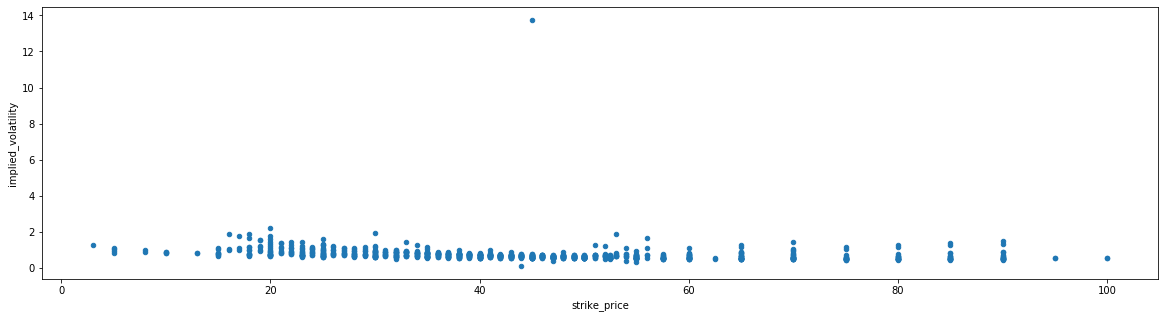

In [2]:
df.plot.scatter('strike_price', 'implied_volatility', figsize=(20,5))

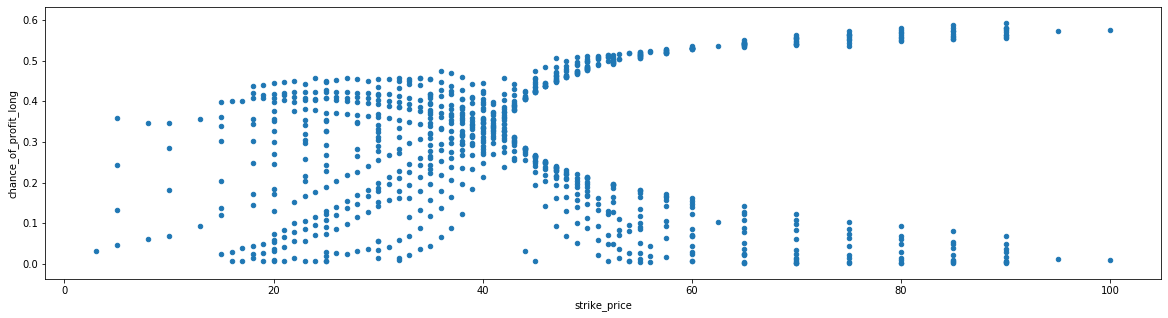

In [3]:
df.plot.scatter('strike_price', 'chance_of_profit_long', figsize=(20,5))

In [4]:
df['product'] = df.apply(lambda row: (row['chance_of_profit_short']/row['implied_volatility']), axis=1)

In [32]:
dfcall = df[df['type'] == 'call']
chance_profit = dfcall['chance_of_profit_long'].describe()['75%']

In [33]:
chance_profit_low_iv = dfcall[dfcall['chance_of_profit_long'] > chance_profit]['implied_volatility'].describe()['25%']

In [34]:
max_profit = dfcall[(dfcall['chance_of_profit_long'] > chance_profit) & (dfcall['implied_volatility'] < chance_profit_low_iv)]['adjusted_mark_price'].max()

In [46]:
dfcall[(dfcall['chance_of_profit_long'] > chance_profit) & (dfcall['implied_volatility'] < chance_profit_low_iv) & (dfcall['adjusted_mark_price'] == max_profit)]

,adjusted_mark_price,ask_price,ask_size,bid_price,bid_size,break_even_price,chance_of_profit_long,chance_of_profit_short,delta,expiration_date,...,previous_close_date,previous_close_price,rho,strike_price,theta,type,url,vega,volume,product
318,20.53,20.95,95,20.1,460,43.53,0.381814,0.618186,0.925798,2020-10-16,...,2020-04-02,22.4,0.101489,23.0,-0.00802,call,https://api.robinhood.com/options/instruments/...,0.04382,0,0.87002


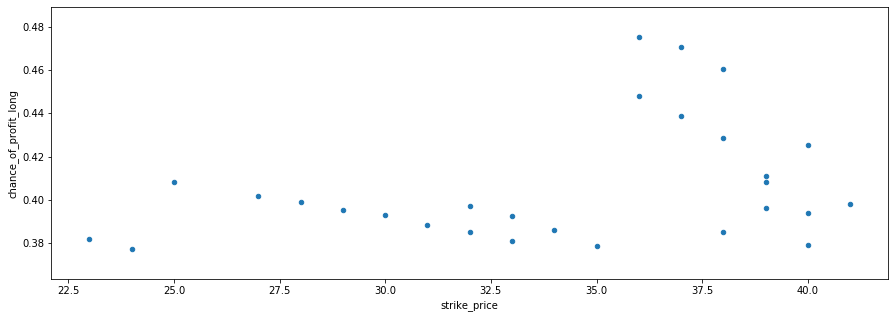

In [36]:
dfcall[(dfcall['chance_of_profit_long'] > chance_profit) & (dfcall['implied_volatility'] < chance_profit_low_iv)].plot.scatter('strike_price', 'chance_of_profit_long', figsize=(15,5))

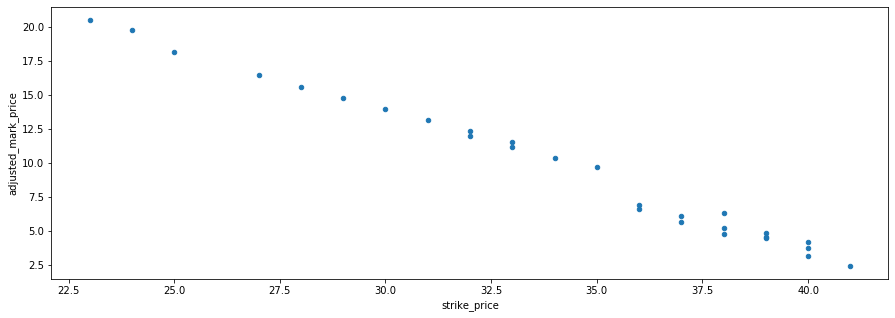

In [37]:
dfcall[(dfcall['chance_of_profit_long'] > chance_profit) & (dfcall['implied_volatility'] < chance_profit_low_iv)].plot.scatter('strike_price', 'adjusted_mark_price', figsize=(15,5))

In [77]:
dfcall[(dfcall['strike_price'] > 35) & (dfcall['strike_price'] < 37)][['adjusted_mark_price', 'strike_price', 'expiration_date', 'volume']].sort_values('adjusted_mark_price', ascending=False).head(10)

,adjusted_mark_price,strike_price,expiration_date,volume
427,10.80,36.0,2020-10-16,0
2101,9.38,36.0,2020-07-17,2
2941,8.93,36.0,2020-06-19,75
2458,8.30,36.0,2020-05-15,0
157,7.63,36.0,2020-05-01,0
152,7.28,36.0,2020-04-24,0
3456,6.95,36.0,2020-04-17,31
150,6.65,36.0,2020-04-09,8
178,6.55,36.0,2020-04-03,5
4480,0.00,36.5,2019-06-14,0
